1.Q).Download the data (marks obtained by 1000 students) given here, and model the data distribution as shown below. Plot the histogram of the data and the Gaussian Fit. 

ANS: Data is loaded and the histogram and gaussian fit are plotted 

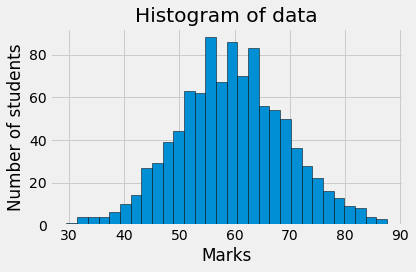

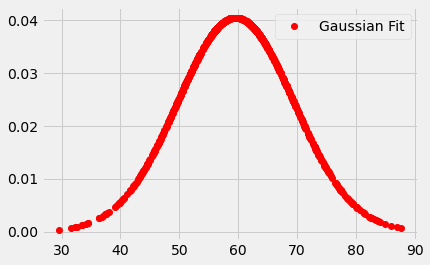

In [3]:
#this code plots the histogram and gaussian fit
import numpy as np 
from scipy.interpolate import *
from scipy.stats import norm
import matplotlib.pyplot as plt
b = np.load('data_x.npy')
mu=np.mean(b)
std=np.std(b)
plt.style.use('fivethirtyeight')
plt.hist(b, bins=30, edgecolor='black')
plt.title('Histogram of data')
plt.xlabel('Marks')
plt.ylabel('Number of students')
plt.tight_layout()
plt.show()
y=(1/(std*np.sqrt(2*np.pi))*np.exp(-(b-mu)**2/(2*std**2)))
plt.plot(b,y,'ro',linewidth=2,label="Gaussian Fit")
plt.legend()
plt.show()


Q) Polynomial curve fitting using least squares for the data points (x, y). Note that we have modelled 'y' in part 1 of the question. Use the first 750 data points to regress the coefficient vector [β0 β1 β2 ... βn] and validate your obtained fit on the remaining held out 250 data points. The polynomial fit can be modelled as 

ANS: 750 data points are used to find a correctc order of polynomial using pseudo inverse method and Mean square error is calculated.AS (J'J) matrix is positive definate and full rank we were able to  find the least square approximation using pseudoinverse method

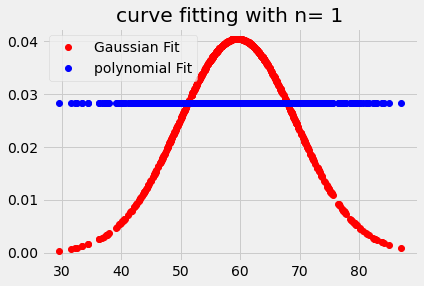

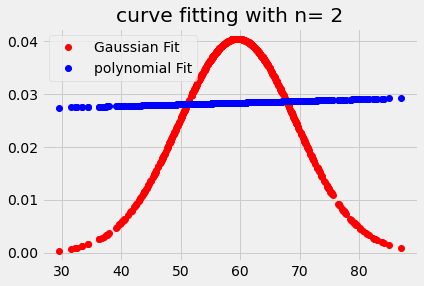

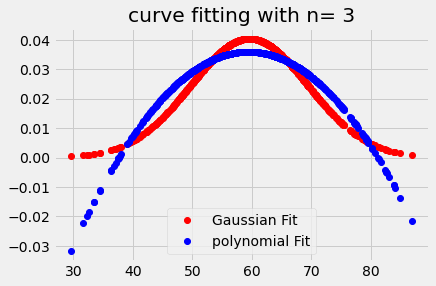

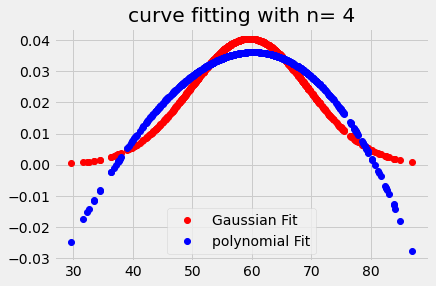

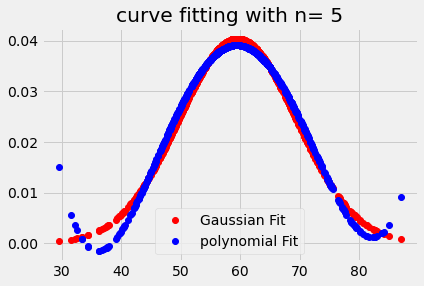

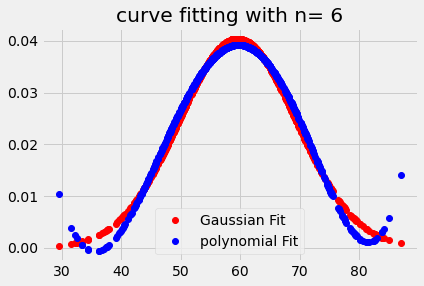

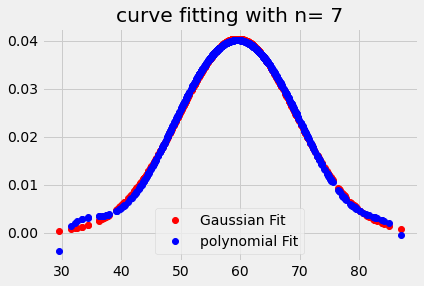

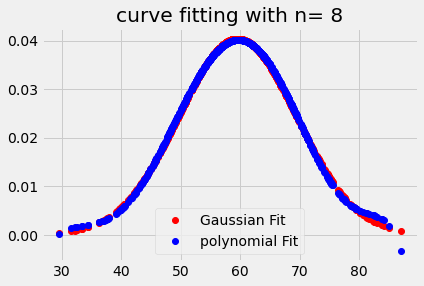

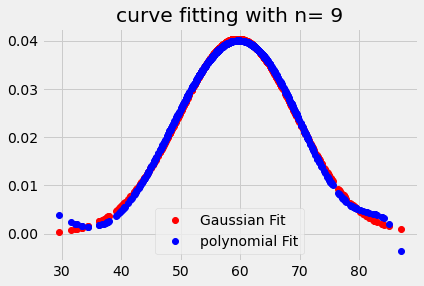

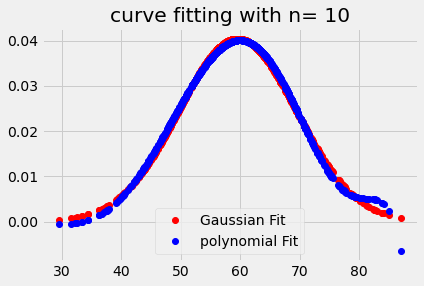

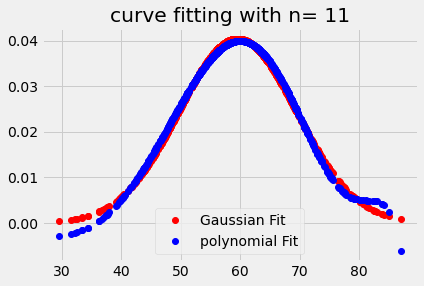

[0.0001310868156104845, 0.00013098357631760393, 2.0240932643896946e-05, 1.9501192706152703e-05, 1.935190675380412e-06, 1.7316408730661863e-06, 1.3326212812684756e-07, 1.2514867770705437e-07, 2.2808681399254578e-07, 4.2282312632092377e-07, 6.098345038180097e-07]


In [4]:
#This code calculates the optimum order of polynomial fit 
T_y=y[0:750]
T_x=b[0:750]
j=[]
MSE=[]
N=[]
for n in range (1,12):
    j=np.ones((len(T_x),1))
    for i in range (1,n):
        j=np.concatenate((j,np.array([np.power(T_x,i)]).T),axis=1)    #J (data matrix) is created 
    B=np.matmul(np.linalg.pinv(j),T_y) # optimum values of the coefficients in the polynomial is calculated using pseudoinverse method  
    y_fit=np.matmul(j,B) # valus of y using modeled polynomial being calculated 
    MSE.append(np.mean(((y_fit-T_y)**2)))
    N.append(n)
    #plotting gaussian and polynomial fit 
    plt.plot(T_x,T_y,'ro',linewidth=2,label="Gaussian Fit")
    plt.plot(T_x,y_fit,'bo',linewidth=2,label="polynomial Fit")
    plt.legend()
    plt.title("curve fitting with n= {}".format(n))
    plt.show()
print(MSE)


      

    



Q)Formulate the above shown polynomial fit as a least squares problem and solve it using the pseudoinverse. Experiment with different values of ‘n’ and report the optimal order of the polynomial for the problem at hand. Also, report the plot "Mean square Error (MSE) vs n". Compute the MSE from held out 250 data points

ANS: The optimal Value of the polynomial order is calculated to be n=8 with MSE value of 1.2514867770705437e-07. As we can observe from the graph.

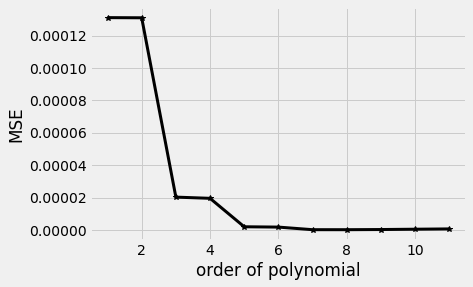

the optimal order of polynomial fit is 8
1.2514867770705437e-07


In [314]:
#This code plots the MSE vs n 
plt.plot(N,MSE,'k*-',linewidth=3)
plt.xlabel("order of polynomial")
plt.ylabel("MSE")
plt.show()
opt_N=N[np.argmin(MSE)]
print("the optimal order of polynomial fit is {}".format(opt_N))
print(min(MSE))


ANS:using the modeled polynomial fit the  MSE of remaining 250 data is found to be 2.256628702006412e-07.

In [7]:
#To fid MSE of the remaining 250 data points 
T_x1=b[750:1000]
T_y1=y[750:1000]
J=np.ones((len(T_x1),1))
for i in range (1,8):
    J=np.concatenate((J,np.array([np.power(T_x1,i)]).T),axis=1)  
C=np.matmul(np.linalg.pinv(J),T_y1) #matrix of optimal coefficients 
y_fit1=np.matmul(J,C)
MSE1=(np.mean(((y_fit1-T_y1)**2)))  
print("The MSE of remaining 250 data={}".format(MSE1))
    
   


The MSE of remaining 250 data=2.256628702006412e-07
[[1.00000000e+00 6.77269484e+01 4.58693954e+03 ... 1.42497596e+09
  9.65092734e+10 6.53627858e+12]
 [1.00000000e+00 4.33840171e+01 1.88217294e+03 ... 1.53691133e+08
  6.66773874e+09 2.89273292e+11]
 [1.00000000e+00 6.44819528e+01 4.15792224e+03 ... 1.11478447e+09
  7.18834794e+10 4.63518713e+12]
 ...
 [1.00000000e+00 6.09419230e+01 3.71391798e+03 ... 8.40583325e+08
  5.12267643e+10 3.12185753e+12]
 [1.00000000e+00 4.85238906e+01 2.35456795e+03 ... 2.69015976e+08
  1.30537018e+10 6.33416397e+11]
 [1.00000000e+00 5.64188592e+01 3.18308768e+03 ... 5.71638543e+08
  3.22511945e+10 1.81957560e+12]]


Q).For the optimal ‘n’ found above, can we solve the least squares problem using the Cholesky Decomposition ? If yes, solve it and compare the polynomial fits obtained using pseudoinverse and Cholesky. If not, then justify your answer. If required you are free to use the in built functions for computing cholesky decomposition.

 ANS: for the optimum order the (J'J) matrix is full colun rank and positive definate which enables us to emply the cholesky decomposition and determine the optimum coefficient values which furthur used to find the fit values and MSE.
                                 The MSE obtained using pseudoinverse method=1.5151659222429427e-07
                                 The MSE obtained using cholesky decomposition method=1.1567875796857108e-07

The MSE obtained using pseudoinverse method=1.5151659222429427e-07
M1 matrix is symmetric
The MSE obtained using cholesky decomposition method=1.1567875796857108e-07


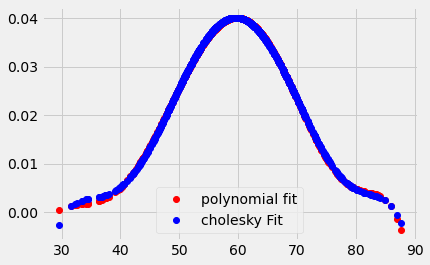

In [5]:
J1=np.ones((len(b),1))
for i in range (1,8):
    J1=np.concatenate((J1,np.array([np.power(b,i)]).T),axis=1)  
D=np.matmul(np.linalg.pinv(J1),y) #matrix of optimal coefficients 
y_fit2=np.matmul(J1,D)
MSE2=(np.mean(((y_fit2-y)**2)))  #mean square error after using polynomial fit
print("The MSE obtained using pseudoinverse method={}".format(MSE2)) 
M1=np.matmul(J1.T,J1)
#checking if the (J'J) matrix is symmetric or not 
if (M1.T.all()==M1.all()):
    print("M1 matrix is symmetric")
else:
    print("M1 matrix is not symmetric")
#to check Rank of J1 matrix
r=np.linalg.matrix_rank(M1)
# print(r)
# print(np.shape(M1))
M2=np.matmul(J1.T,y)
# print(np.shape(M2))
L=np.linalg.cholesky(M1) #Determining the Lower triangular Matrix which is cholesky factor of (J'J)
# print(L.T)
w=np.linalg.solve(L,M2) #following the three step procedure of cholesky factorization to obtain the coeff values 
# print(w)
DC=np.linalg.solve(L.T,w)
# print(DC)
y_fitc=np.matmul(J1,DC)
MSEC=(np.mean(((y_fitc-y)**2))) #mean square error calculation after using cholesky 
print("The MSE obtained using cholesky decomposition method={}".format(MSEC)) 
plt.plot(b,y_fit2,'ro',linewidth=2,label="polynomial fit")
plt.plot(b,y_fitc,'bo',linewidth=2,label="cholesky Fit")
plt.legend()




Question : 2
Portfolio Optimization Problem Formulation: Assume that you have some fixed amount of money and you plan to invest in a set of stocks A, B, C, D, E, F, G, H, I and J. From the last 10 years data, the relative price changes of these stocks was modelled using the mean vector (given here) and the covariance matrix (given here). Formulate an optimization problem and optimize it using the cvxopt library and predict the optimal split of money to be invested (in %) amongst these stocks so that we have a minimum return of atleast 60 %. Comment your code at appropriate locations.


ANS: Here we have to optimize an investment portfoilio such tha the profit is maximized and risk is minimized with given constrains. our Assets are A, B, C, D, E, F, G, H, I,J

Let, w1,w2,w3,w4,w5,w6,w7,w8,w9,w10 be the parts of a given capital which is invested in the Assets respectively

Let Avg=[r1,r2,r3............r10].T be the average price Matrix and cov=[] be the covarience Matrix for the given assets Now To formulate the optimization problem

According to Standard form of a quardratic programming(QP) we can formulate
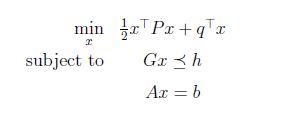
objectivefunction/(cost Function)  :

minimize (0.2*[w].T*[cov]*[w]+[Avg].T*[w])

with constrains :

-[Avg].^T*[w]<=- 0.6 (The return should be minimum 60%)

-[I]*[w]<0 (investment in each asset should be done)

w1+w2+w3+..+w10=1 (sum of each investment should be 1)

The QP problem is solved using CVXOPT in python to get the optimum fraction of investment for desired return
optimum fractions of investment in corresponding Assets:


[A= 3.16e-01]
[B= 2.20e-09]
[C= 2.19e-09]
[D= 5.34e-01]
[E= 1.05e-09]
[F= 8.14e-10]
[G= 4.72e-09]
[H= 1.50e-01]
[I= 2.21e-07]
[J= 6.10e-10]

Return %= 69.16525857 % 
We can see for maximum return more money should be invested in Asset A.

In [12]:
# This code solves the QP problem to perform the portfolio optimization 
import numpy as np 
from cvxopt import matrix,solvers
from cvxopt.blas import dot
avg= np.load('avg.npy')
cov=np.load('cov.npy')
Assets = ['A','B','C','D','E','F','G','H','I','J']
#defining constrains and varriable matrices 
I=matrix(-np.diag(np.ones(10)),tc='d')
G=matrix(np.concatenate((I,-avg.T),axis=0),tc='d') #inequality constrain matrix 
h=matrix(np.vstack((np.zeros((10,1)),-0.6)),tc='d')
A=matrix(1.0,(1,10),tc='d')# equality constrain marix 
b=matrix(1.0)
q=-matrix(avg,tc='d') #avg matrix 
P=matrix(0.2*cov,tc='d')# covarience matrix 
# solving QP problems 
sol=solvers.qp(P,q,G,h,A,b) #solving QP optimization problem  (minimizing the objective function/cost function)
print(sol['x'])
ans=sol['x']
data=np.array(ans.T).flatten()
print((data))
#verification of the optimization preocess by cross verrifying constrains
total=np.sum(ans) #Total investment should add upto 1
print(total)
returns =np.matmul(avg.T,ans)
print("total return percentage = {}".format(returns*100)) #net return should not be less than 60%

     pcost       dcost       gap    pres   dres
 0: -4.8987e-01 -1.6368e+00  2e+01  4e+00  4e+00
 1: -3.2055e-01 -1.0737e+00  1e+00  6e-02  7e-02
 2: -3.1814e-01 -4.0601e-01  9e-02  4e-03  4e-03
 3: -3.5819e-01 -3.7044e-01  1e-02  1e-05  2e-05
 4: -3.6248e-01 -3.6274e-01  3e-04  2e-07  2e-07
 5: -3.6263e-01 -3.6264e-01  3e-06  2e-09  2e-09
 6: -3.6263e-01 -3.6263e-01  3e-08  2e-11  2e-11
Optimal solution found.
[ 3.16e-01]
[ 2.20e-09]
[ 2.19e-09]
[ 5.34e-01]
[ 1.05e-09]
[ 8.14e-10]
[ 4.72e-09]
[ 1.50e-01]
[ 2.21e-07]
[ 6.10e-10]

[3.15916241e-01 2.20002113e-09 2.18823002e-09 5.34077684e-01
 1.05390353e-09 8.14284212e-10 4.72270872e-09 1.50005842e-01
 2.20747165e-07 6.09835876e-10]
1.0
total return percentage = [[69.16525857]]
